# Creation of dataframes containing information of RNA-sequence analysis
In this code the RNA-seq data is organized and filtered. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import pandas as pd
import os 

In [8]:
# Make new dataframe and rename
data_gene= pd.read_csv('/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Data/THP-1_counts_anno_transcript.csv', sep=',')
data_gene.drop(['Transcript'], axis=1)
# print(data_gene)
data_expression= pd.read_csv('/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Data/THP-1_counts.csv')
data_expression

,Geneid,Thp1-mono-rep1,Thp1-mono-rep2,Thp1-macro-rep1,Thp1-macro-rep2,Thp1-M.tb-rep1,Thp1-M.tb-rep2,Geneid.1,Thp1-mono-rep1.1,Thp1-mono-rep2.1,Thp1-macro-rep1.1,Thp1-macro-rep2.1,Thp1-M.tb-rep1.1,Thp1-M.tb-rep2.1
0,ENSG00000223972,0,0,0,0,0,2,ENSG00000223972,0.000000,0.000000,0.000000,0.000000,0.000000,0.054399
1,ENSG00000227232,818,1017,761,377,270,317,ENSG00000227232,21.565256,20.377796,13.622955,9.641877,9.771781,8.622247
2,ENSG00000243485,0,0,0,0,0,0,ENSG00000243485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000237613,0,0,0,0,0,0,ENSG00000237613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000268020,0,0,0,0,0,0,ENSG00000268020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60230,ENSG00000227629,0,0,0,0,0,0,ENSG00000227629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60231,ENSG00000237917,4,20,24,10,10,4,ENSG00000237917,0.105454,0.400743,0.429633,0.255753,0.361918,0.108798
60232,ENSG00000231514,0,0,0,0,0,0,ENSG00000231514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60233,ENSG00000235857,0,0,0,0,0,0,ENSG00000235857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
data_gene

,Geneid,Chr,Transcript,Start,End,Strand,Transcriptid,GeneName
0,ENSG00000223972,chr1,transcript,11869,14409,+,ENST00000456328,ENSG00000223972
1,ENSG00000223972,chr1,transcript,11872,14412,+,ENST00000515242,ENSG00000223972
2,ENSG00000223972,chr1,transcript,11874,14409,+,ENST00000518655,ENSG00000223972
3,ENSG00000223972,chr1,transcript,12010,13670,+,ENST00000450305,ENSG00000223972
4,ENSG00000227232,chr1,transcript,14363,29370,-,ENST00000423562,ENSG00000227232
...,...,...,...,...,...,...,...,...
204935,ENSG00000224240,chrY,transcript,28695572,28695890,+,ENST00000420810,ENSG00000224240
204936,ENSG00000227629,chrY,transcript,28732789,28737748,-,ENST00000456738,ENSG00000227629
204937,ENSG00000237917,chrY,transcript,28740998,28780799,-,ENST00000435945,ENSG00000237917
204938,ENSG00000231514,chrY,transcript,28772667,28773306,-,ENST00000435741,ENSG00000231514


In [6]:
# Merging the expression with the Gene
df3= pd.merge(data_expression, data_gene, how="left", on=['Geneid'])
df3= df3.loc[df3.duplicated(subset='Geneid', keep=False)]
#print(df3)
df3.to_csv('/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Thp1_merged_genes.csv')
df3

,Geneid,Thp1-mono-rep1,Thp1-mono-rep2,Thp1-macro-rep1,Thp1-macro-rep2,Thp1-M.tb-rep1,Thp1-M.tb-rep2,Geneid.1,Thp1-mono-rep1.1,Thp1-mono-rep2.1,...,Thp1-macro-rep2.1,Thp1-M.tb-rep1.1,Thp1-M.tb-rep2.1,Chr,Transcript,Start,End,Strand,Transcriptid,GeneName
0,ENSG00000223972,0,0,0,0,0,2,ENSG00000223972,0.000000,0.000000,...,0.000000,0.000000,0.054399,chr1,transcript,11869.0,14409.0,+,ENST00000456328,ENSG00000223972
1,ENSG00000223972,0,0,0,0,0,2,ENSG00000223972,0.000000,0.000000,...,0.000000,0.000000,0.054399,chr1,transcript,11872.0,14412.0,+,ENST00000515242,ENSG00000223972
2,ENSG00000223972,0,0,0,0,0,2,ENSG00000223972,0.000000,0.000000,...,0.000000,0.000000,0.054399,chr1,transcript,11874.0,14409.0,+,ENST00000518655,ENSG00000223972
3,ENSG00000223972,0,0,0,0,0,2,ENSG00000223972,0.000000,0.000000,...,0.000000,0.000000,0.054399,chr1,transcript,12010.0,13670.0,+,ENST00000450305,ENSG00000223972
4,ENSG00000227232,818,1017,761,377,270,317,ENSG00000227232,21.565256,20.377796,...,9.641877,9.771781,8.622247,chr1,transcript,14363.0,29370.0,-,ENST00000423562,ENSG00000227232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204897,ENSG00000172288,0,0,0,0,0,0,ENSG00000172288,0.000000,0.000000,...,0.000000,0.000000,0.000000,chrY,transcript,27768309.0,27771049.0,+,ENST00000306609,ENSG00000172288
204918,ENSG00000172283,0,0,0,0,0,0,ENSG00000172283,0.000000,0.000000,...,0.000000,0.000000,0.000000,chrY,transcript,28121660.0,28132811.0,+,ENST00000338673,ENSG00000172283
204919,ENSG00000172283,0,0,0,0,0,0,ENSG00000172283,0.000000,0.000000,...,0.000000,0.000000,0.000000,chrY,transcript,28121696.0,28134216.0,+,ENST00000306589,ENSG00000172283
204925,ENSG00000215507,0,0,0,0,0,0,ENSG00000215507,0.000000,0.000000,...,0.000000,0.000000,0.000000,chrY,transcript,28269821.0,28279455.0,+,ENST00000448881,ENSG00000215507


### Dataframe dividing the values

In [164]:
# Lees de CSV in een DataFrame
df = pd.read_csv("/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Data/Thp1_merged_genes.csv")

# Groepeer de dataframe op 'Geneid' en bereken het aantal exemplaren van elke 'Geneid'
counts_per_group = df3.groupby('Geneid').size()

# Maak een nieuwe DataFrame door de groepering te transformeren naar de oorspronkelijke DataFrame
df3['Counts_per_Geneid'] = df3['Geneid'].map(counts_per_group)

# Deel de waarden van de Thp-kolommen door het aantal exemplaren van dezelfde Geneid
thp_columns = ['Thp1-mono-rep1', 'Thp1-mono-rep2', 'Thp1-macro-rep1', 'Thp1-macro-rep2', 'Thp1-M.tb-rep1', 'Thp1-M.tb-rep2']
df3[thp_columns] = df3[thp_columns].div(df3['Counts_per_Geneid'], axis=0)



### Make histogram of gene expression (RNAseq) distribution along chromosome

In [159]:
df = pd.read_csv('/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Data/Thp1_merged_genes_norm_v0.csv')

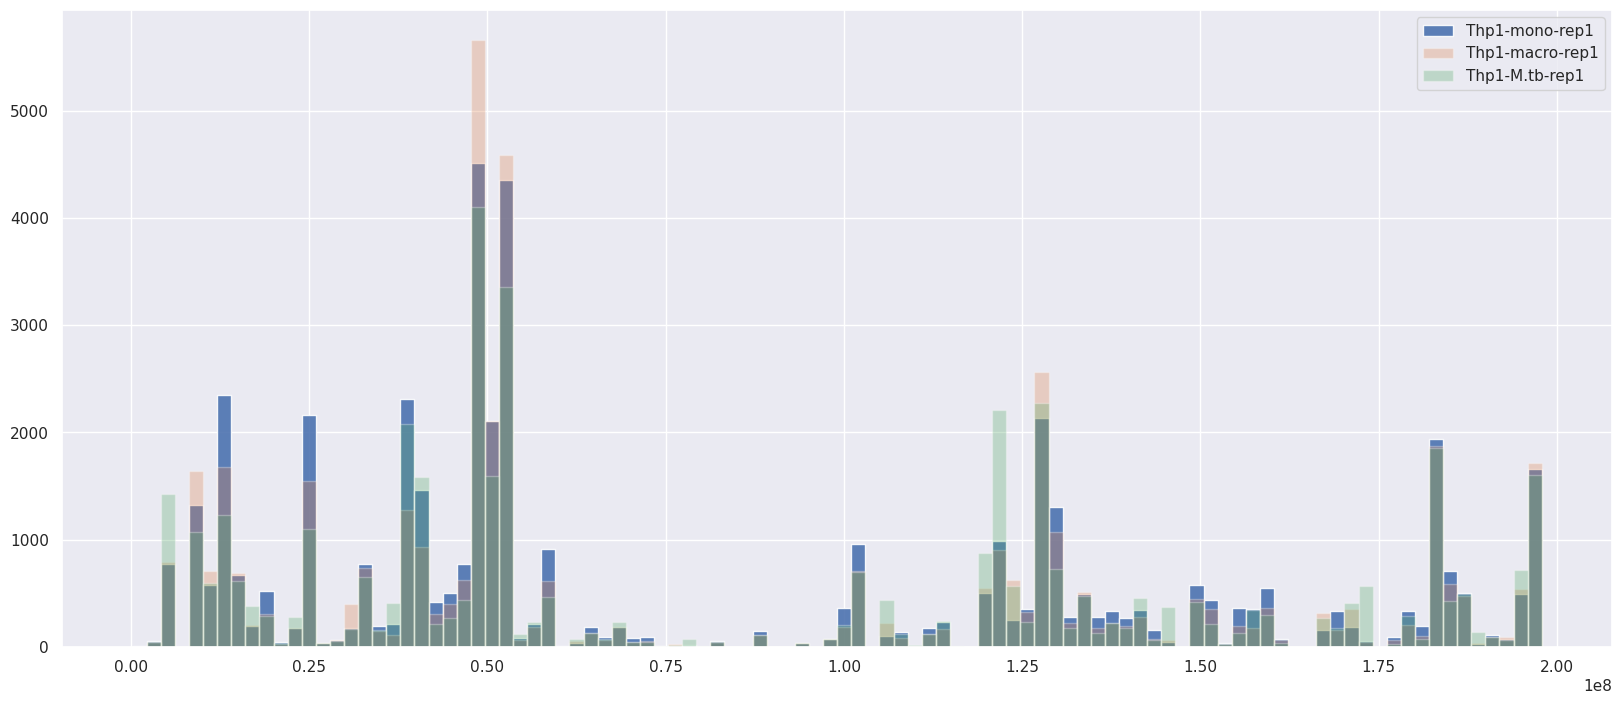

In [160]:
def get_bins(df,chr,type):
    w = df[df['Chr']==f'{chr}'][f'{type}']
    a = df[df['Chr']==f'{chr}']['Start']
    return w,a
chr = 'chr3'

#Calculate weights 
w,a = get_bins(df=df,chr=chr,type='Thp1-mono-rep1')
plt.hist(a, weights=w, bins = 100, label = 'Thp1-mono-rep1', alpha = 0.9)

w,a = get_bins(df=df,chr=chr,type='Thp1-macro-rep1')
plt.hist(a,weights=w, bins = 100,label = 'Thp1-macro-rep1', alpha = 0.3)

w,a = get_bins(df=df,chr=chr,type='Thp1-M.tb-rep1')
plt.hist(a,weights=w, bins = 100,label = 'Thp1-M.tb-rep1', alpha = 0.3)
plt.legend()


## Prepare data frame of gene expression (RNAseq) for group analysis

In [161]:
# Read the original table into a DataFrame
df = pd.read_csv("/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Data/Thp1_merged_genes_norm_v0.csv")

# Melt the DataFrame to unpivot it from wide to long format
melted_df = pd.melt(df, id_vars=['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Transcriptid', 'GeneName'])

# Extract the cell type and replicate information from the variable column
melted_df[['CellType', 'Rep', 'replicate']] = melted_df['variable'].str.split('-', expand=True)

# Combine 'CellType' and 'Rep' to get the final 'type' column
melted_df['type'] = melted_df['CellType'] + '-' + melted_df['Rep']

# Drop unnecessary columns
melted_df.drop(['variable', 'CellType', 'Rep', 'replicate'], axis=1, inplace=True)

# Group by 'Geneid', 'Start', 'Chr', 'GeneName', 'type', and calculate the mean of the 'value' column
new_df = melted_df.groupby(['Geneid', 'Start', 'Chr', 'GeneName', 'type']).agg({'value': 'mean'}).reset_index()

# Rename columns to match the desired layout
new_df.rename(columns={'Start': 'start', 'value': 'weights'}, inplace=True)

# Reorder columns
new_df = new_df[['start', 'weights', 'type', 'Chr', 'Geneid', 'GeneName']]

# Display the new DataFrame
print(new_df)
new_df.to_csv("/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Thp1_rearranged.csv", index=False)


           start  weights        type    Chr           Geneid         GeneName
0       99883667    0.385   Thp1-M.tb   chrX  ENSG00000000003  ENSG00000000003
1       99883667    0.525  Thp1-macro   chrX  ENSG00000000003  ENSG00000000003
2       99883667    0.765   Thp1-mono   chrX  ENSG00000000003  ENSG00000000003
3       99887538    0.385   Thp1-M.tb   chrX  ENSG00000000003  ENSG00000000003
4       99887538    0.525  Thp1-macro   chrX  ENSG00000000003  ENSG00000000003
...          ...      ...         ...    ...              ...              ...
443371  27543189    0.000  Thp1-macro  chr21  ENSG00000273492  ENSG00000273492
443372  27543189    0.150   Thp1-mono  chr21  ENSG00000273492  ENSG00000273492
443373  27543234    0.000   Thp1-M.tb  chr21  ENSG00000273492  ENSG00000273492
443374  27543234    0.000  Thp1-macro  chr21  ENSG00000273492  ENSG00000273492
443375  27543234    0.150   Thp1-mono  chr21  ENSG00000273492  ENSG00000273492

[443376 rows x 6 columns]


In [151]:
# Read the original table into a DataFrame
df = pd.read_csv("/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Data/Thp1_merged_genes_norm_v0.csv")

# Calculate the average expression value for each stage
df['Thp1-mono'] = (df['Thp1-mono-rep1'] + df['Thp1-mono-rep2']) / 2
df['Thp1-macro'] = (df['Thp1-macro-rep1'] + df['Thp1-macro-rep2']) / 2
df['Thp1-M.tb'] = (df['Thp1-M.tb-rep1'] + df['Thp1-M.tb-rep2']) / 2


# Columns to stack
selected_columns = ['Thp1-mono', 'Thp1-macro', 'Thp1-M.tb']

# Stacking selected columns
stacked_df = pd.melt(df, id_vars=['Start', 'End','Geneid','GeneName','Chr'], value_vars=selected_columns, var_name='Cell_type', value_name='Weights')

stacked_df
stacked_df.to_csv("/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Thp1_rearranged_v21.csv", index=False)

In [152]:
#Filtering out all the chromosomes with extra description and put them in chronical order

# Create a copy of the DataFrame
filtered_df = stacked_df.copy()

# Filter out rows with chromosome names not in the range 'chr1' to 'chr22', 'chrX', and 'chrY'
filtered_df = filtered_df[filtered_df['Chr'].str.match(r'^chr(?:[1-9]|1[0-9]|2[0-2]|X|Y)$')]

# Convert the chromosome column to a categorical data type with the desired order
chromosome_order = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 
                    'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 
                    'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY']
filtered_df['Chr'] = pd.Categorical(filtered_df['Chr'], categories=chromosome_order, ordered=True)

# Sort the DataFrame based on the chromosome column
filtered_df = filtered_df.sort_values(by='Chr')

# Reset the index
filtered_df = filtered_df.reset_index(drop=True)

# Check the resulting DataFrame
print(filtered_df)

#Save as csv
filtered_df.to_csv("/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Thp1_rearranged_v22.csv", index=False)

            Start        End           Geneid         GeneName   Chr  \
0           11869      14409  ENSG00000223972  ENSG00000223972  chr1   
1       155580032  155584726  ENSG00000125459  ENSG00000125459  chr1   
2       155580034  155581138  ENSG00000125459  ENSG00000125459  chr1   
3       155580035  155581371  ENSG00000125459  ENSG00000125459  chr1   
4       155580045  155582273  ENSG00000125459  ENSG00000125459  chr1   
...           ...        ...              ...              ...   ...   
482287   14465804   14468226  ENSG00000224060  ENSG00000224060  chrY   
482288   14460540   14468218  ENSG00000224060  ENSG00000224060  chrY   
482289    9904196    9906760  ENSG00000225685  ENSG00000225685  chrY   
482290   15016029   15025765  ENSG00000067048  ENSG00000067048  chrY   
482291   28269867   28275354  ENSG00000215507  ENSG00000215507  chrY   

         Cell_type  Weights  
0        Thp1-mono    0.000  
1       Thp1-macro    0.525  
2       Thp1-macro    0.525  
3       Thp1-ma

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/l

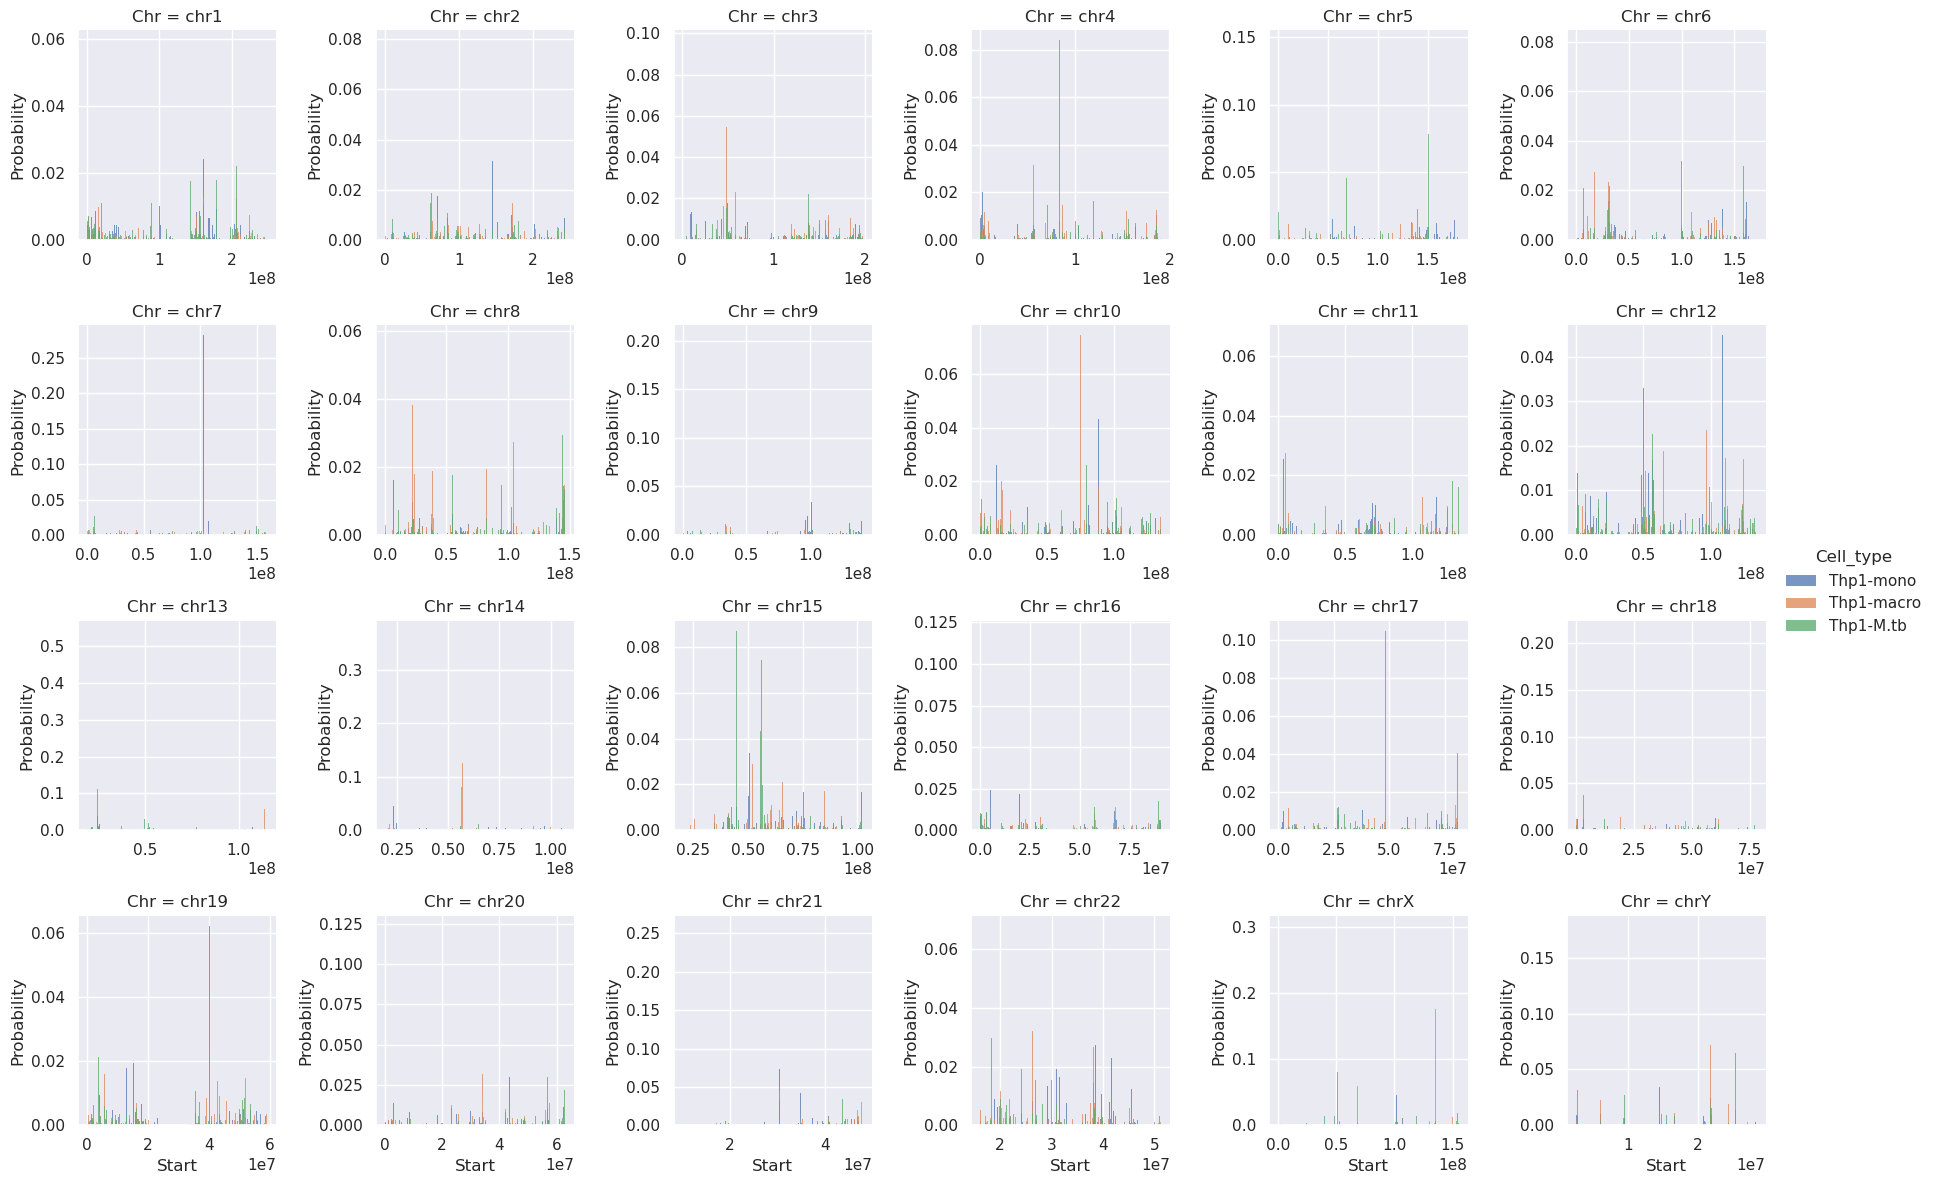

In [126]:
#Plotting the histogram after removal of extras

save_images_path= '/media/msbb/ssd2/Yasmine_copy/RNA_seq_analysis/Figures'
g = sns.FacetGrid(filtered_df, col="Chr", hue = "Cell_type",  col_wrap=6,sharex=False, sharey=False)

g.map(sns.histplot, 
    'Start',
    weights = stacked_df['Weights'],
    # binrange=(0.4,1.8),
    bins = 1000,
    label = "Cell_type",
    stat = 'probability',
)
g.add_legend()
plt.savefig(f'{save_images_path}/RNA_expression_norm.png')